In [294]:
import matplotlib.lines as mlines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt




In [298]:
# Import Data
df = pd.read_excel('gini.xlsx')

#remove country South Africa
df = df[df['Country'] != 'South Africa']
df = df[df['Year 2'] > 45]

In [299]:
# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='#99d98c' if p1[1]-p2[1] > 0 else '#e5383b', marker='o', markersize=5)
    ax.add_line(l)
    return l

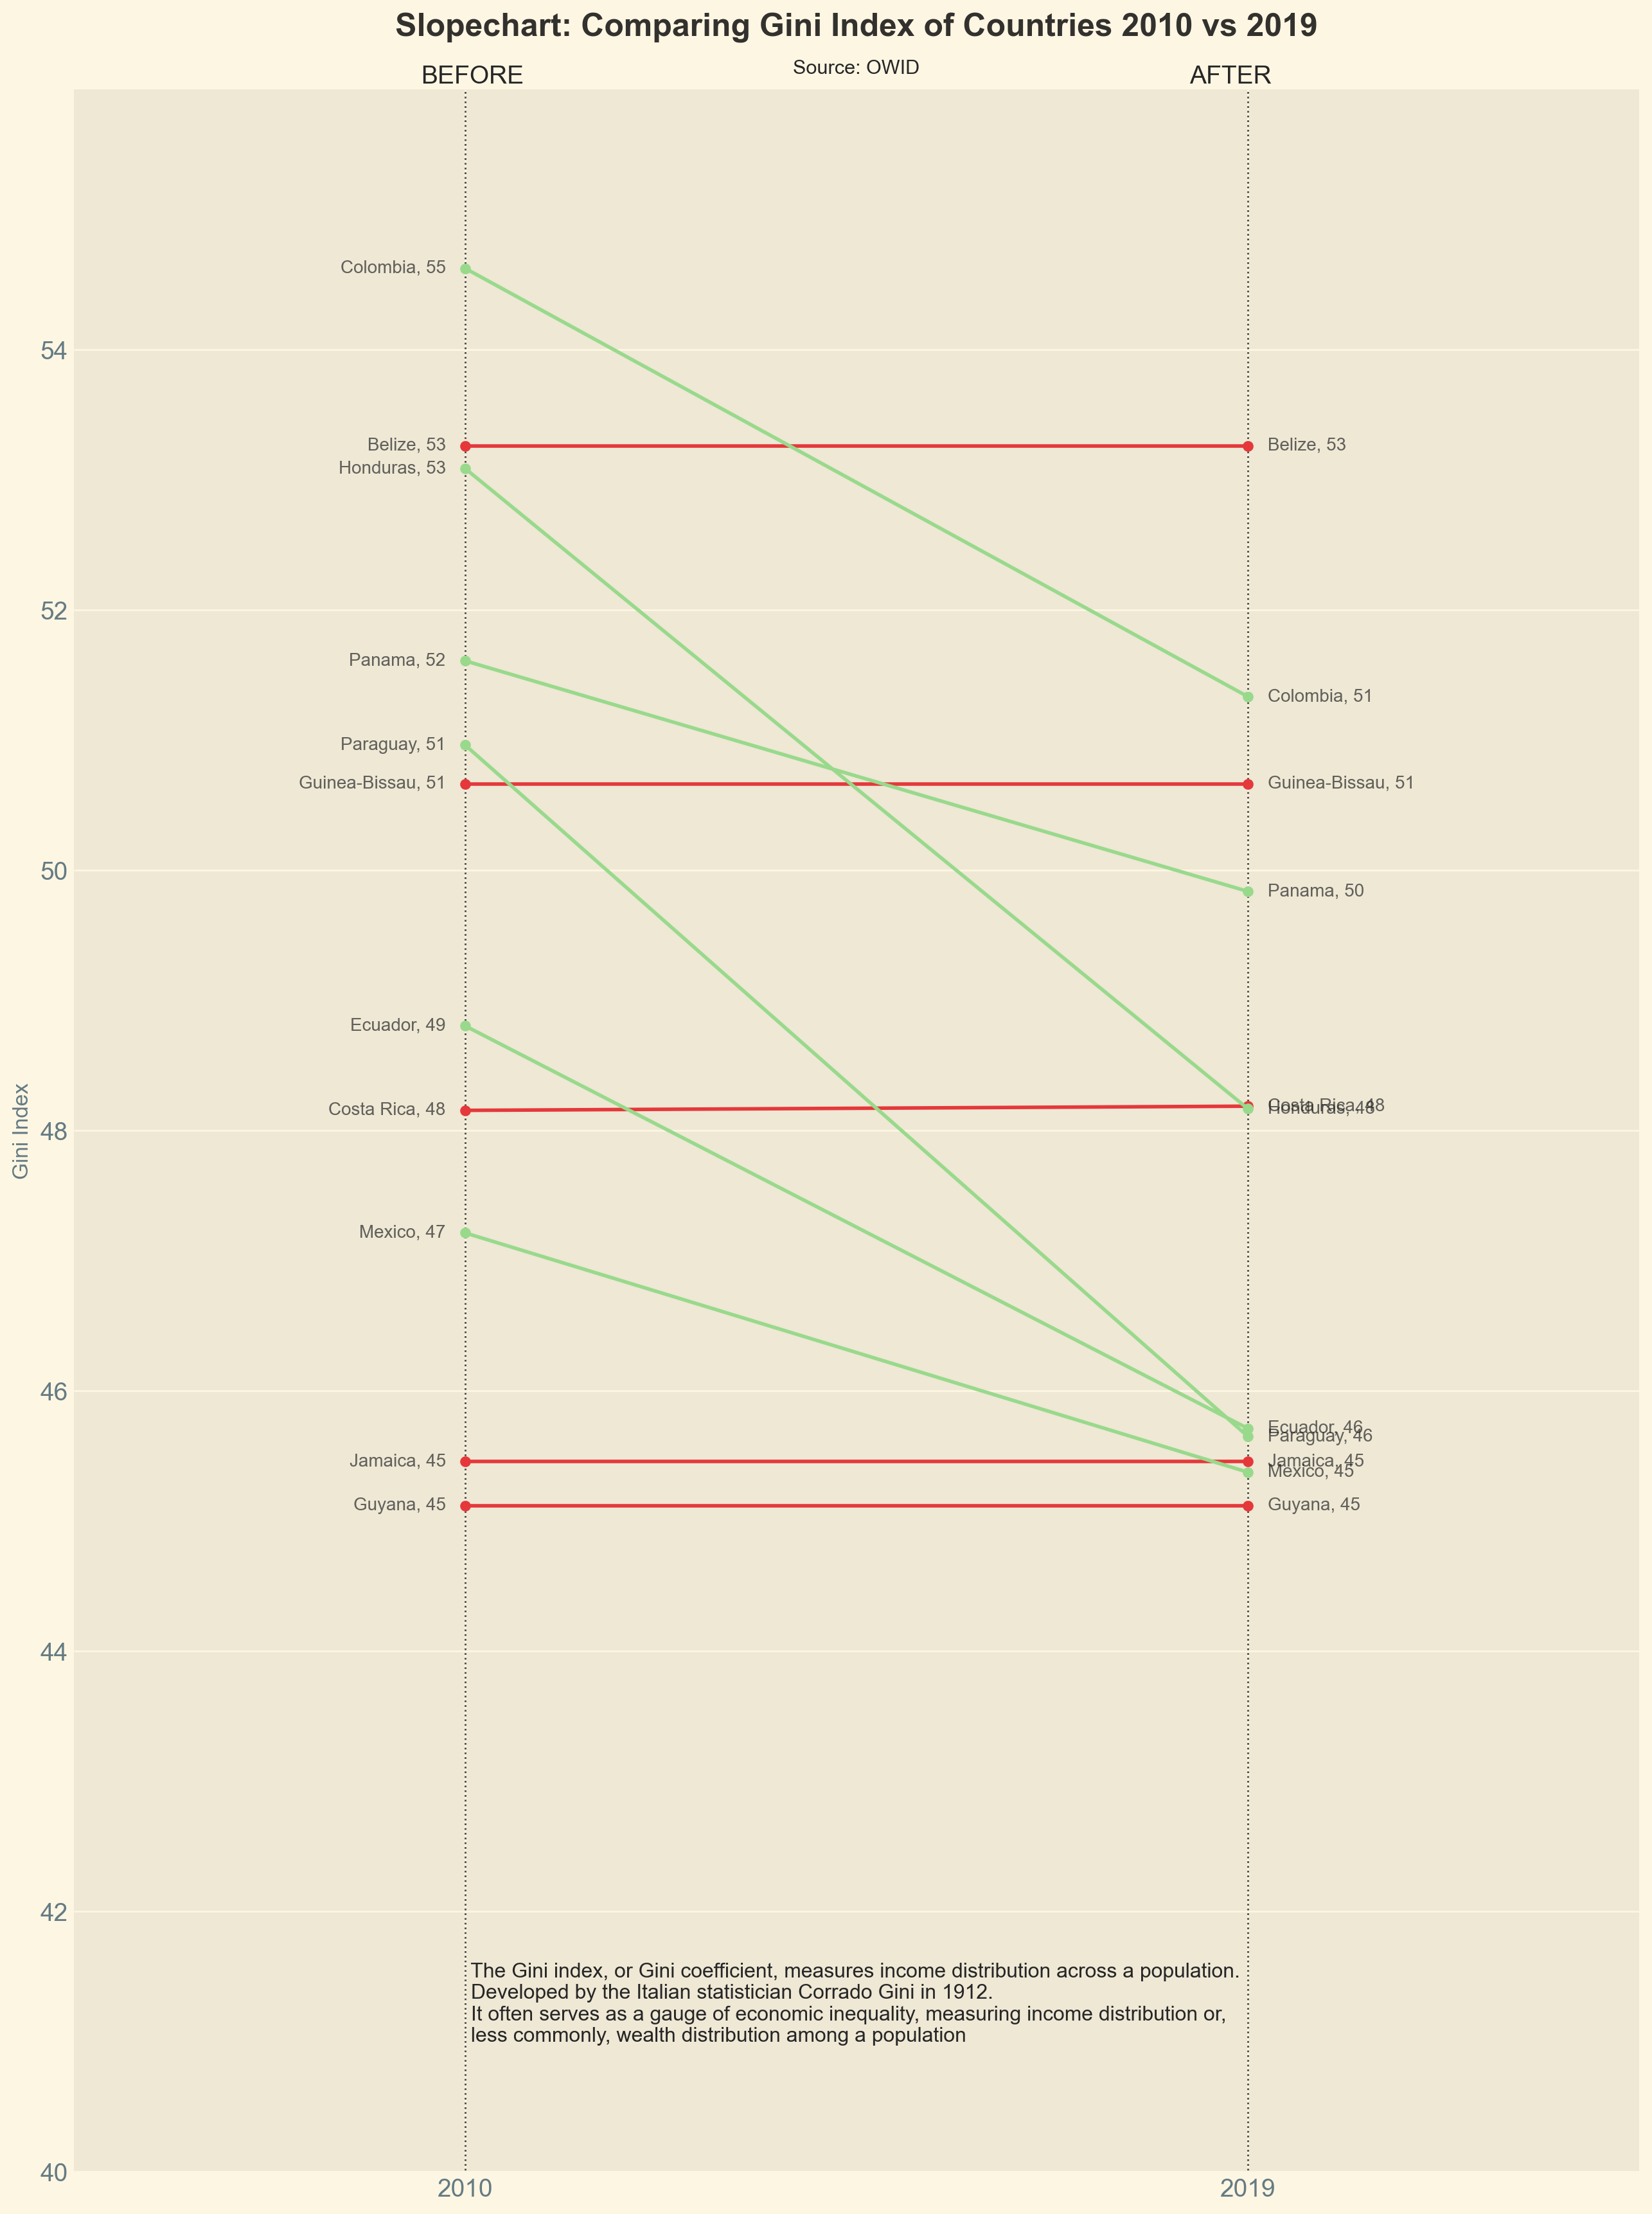

In [305]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots(1,1,figsize=(14,20), dpi= 200)

# Vertical Lines
ax.vlines(x=1, ymin=25, ymax=56, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=25, ymax=56, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df['Year 1'], x=np.repeat(1, df.shape[0]), s=10, color='black', alpha=0.2)
ax.scatter(y=df['Year 2'], x=np.repeat(3, df.shape[0]), s=10, color='black', alpha=0.2)

# Line Segmentsand Annotation
for p1, p2, c in zip(df['Year 1'], df['Year 2'], df['Country']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', alpha =0.7, fontdict={'size':10})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', alpha =0.7, fontdict={'size':10})

# 'Before' and 'After' Annotations
ax.text(1.2-0.05, 56.1, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
ax.text(2.8+0.05, 56.1, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# Decoration
ax.set_title("Slopechart: Comparing Gini Index of Countries 2010 vs 2019", fontdict={'size':18}, pad=30, color='black', alpha=0.8, weight='bold')
#subtitle
ax.text(0.5, 1.01, 'Source: OWID', horizontalalignment='center', verticalalignment='center', fontdict={'size':11}, transform=ax.transAxes)
ax.set(xlim=(0,4), ylim=(40,56), ylabel='Gini Index')
ax.set_xticks([1,3])
ax.set_xticklabels(["2010", "2019"])
ax.set_yticks(np.arange(40,56,2))

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)

#Add text on the plot "The Gini index, or Gini coefficient, measures income distribution across a population. Developed by the Italian statistician Corrado Gini in 1912, it often serves as a gauge of economic inequality, measuring income distribution or, less commonly, wealth distribution among a population.12. The coefficient ranges from 0 (or 0%) to 1 (or 100%), with 0 representing perfect equality and 1 representing perfect inequality. Values over 1 are theoretically possible due to negative income or wealth"

ax.annotate(" The Gini index, or Gini coefficient, measures income distribution across a population. \n Developed by the Italian statistician Corrado Gini in 1912. \n It often serves as a gauge of economic inequality, measuring income distribution or, \n less commonly, wealth distribution among a population", xy=(1, 41), xytext=(1, 41), fontsize=11.5)

plt.savefig('gini.png', dpi=300)


